In [1]:
import os
import sys
sys.path.append('/Users/mnannan/dev/supelec/ngsa/assignments/Assignement 2 ')

from main import pipeline
from core.io.loader import *
from features.features_extractor import FeaturesExtractor
from features.processing import features_processing
from models.cross_validation import *
from plot.features_importances import plot_features_importance

from datetime import datetime

%matplotlib inline



In [ ]:
train = get_data_with_node_information('train', data_dir='../data')
test = get_data_with_node_information('test', data_dir='../data')
features_extractor = FeaturesExtractor(pipeline)
train = features_extractor.fit_transform(train)
test = features_extractor.transform(test)

In [2]:
train = pd.read_csv('../data/train_2019-01-12.csv')

In [3]:
test = pd.read_csv('../data/test_2019-01-12.csv')

In [6]:
selected_columns = [
    'title_overlap',
    'publication_date_diff',
    'common_authors',
    'same_journal',
    'authors_collaboration',
    'collaboration_min_distance',
    'collaboration_mean_distance',
    'writer_in_target_paper',
    'writer_collaborators',
    'writer_collaboration_min_distance',
    'writer_collaboration_mean_distance',
    'source_paper_citations',
    'target_paper_citations',
    'source_number_of_papers_cited',
    'target_number_of_papers_cited',
    'adamic_adar',
    'common_neighbors',
    'jaccard_coefficient',
    'preferential_attachment',
    'max_authors_adamic_adar',
    'max_authors_common_neighbors',
    'max_authors_jaccard_coefficient',
    'max_authors_preferential_attachment',
    'title_cosine_similarity',
    'abstract_cosine_similarity',
    'journal_cosine_similarity', 
    'source_title_target_abstract_cosimilarity',
    'source_abstract_target_title_cosimilarity',
    'pagerank_source',
    'pagerank_target'
]

x_train = features_processing(train[selected_columns]).values
x_test = features_processing(test[selected_columns]).values
y_train = train.category.values

In [7]:
from sklearn.ensemble import RandomForestClassifier

seed = 123

model_args = {
    'n_jobs': -1,
    'n_estimators': 100,
    'random_state': seed,
    'criterion': 'entropy',
    'max_features': 'log2'
}

In [8]:
y_pred, f1_list = cross_validation(RandomForestClassifier, model_args, x_train, y_train)

Epoch 1
f1: 0.977228376715002
Epoch 2
f1: 0.9778209267496031
Epoch 3
f1: 0.9777338692173548
Epoch 4
f1: 0.9780736688658119
Epoch 5
f1: 0.9779920257698285


In [9]:
np.mean(f1_list)

0.97776977346352

jaccard_coefficient                          0.208484
adamic_adar                                  0.202816
common_neighbors                             0.141235
publication_date_diff                        0.083911
abstract_cosine_similarity                   0.068965
target_paper_citations                       0.045352
preferential_attachment                      0.042101
source_abstract_target_title_cosimilarity    0.035338
pagerank_target                              0.025625
source_title_target_abstract_cosimilarity    0.024032
source_number_of_papers_cited                0.017605
title_cosine_similarity                      0.014974
target_number_of_papers_cited                0.012144
collaboration_mean_distance                  0.010057
pagerank_source                              0.009806
source_paper_citations                       0.007822
collaboration_min_distance                   0.007745
writer_collaboration_mean_distance           0.007451
journal_cosine_similarity   

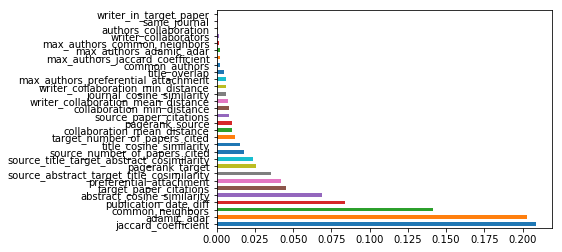

In [10]:
model = RandomForestClassifier(**model_args)
model.fit(x_train, y_train)
plot_features_importance(model.feature_importances_, selected_columns)

In [11]:
from datetime import datetime

In [12]:
date = datetime.now().isoformat().split(".")[0]
prediction_name = 'rf_graph_features_neighborhood_metrics_authors_neighborhood_metrics_nlp_log2_max_features{date}.csv'.format(date=date)
prediction_dir = '../submissions'
y_pred = model.predict(x_test)
y_pred = pd.Series(data=y_pred).rename('category').rename_axis('id', axis='index')
y_pred.to_csv(os.path.join(prediction_dir, prediction_name), header=True)

In [15]:
model.

array([0, 1])

## 0.97023 on the leaderboard